# Libraries and Data Inspection

In [ ]:
import pandas as pd 
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns
import os 
import warnings
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,root_mean_squared_error
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("MicrosoftStock.csv",parse_dates=True,index_col=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-02-08 to 2018-02-07
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 78.7+ KB


In [ ]:
df.describe()

,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


# EDA

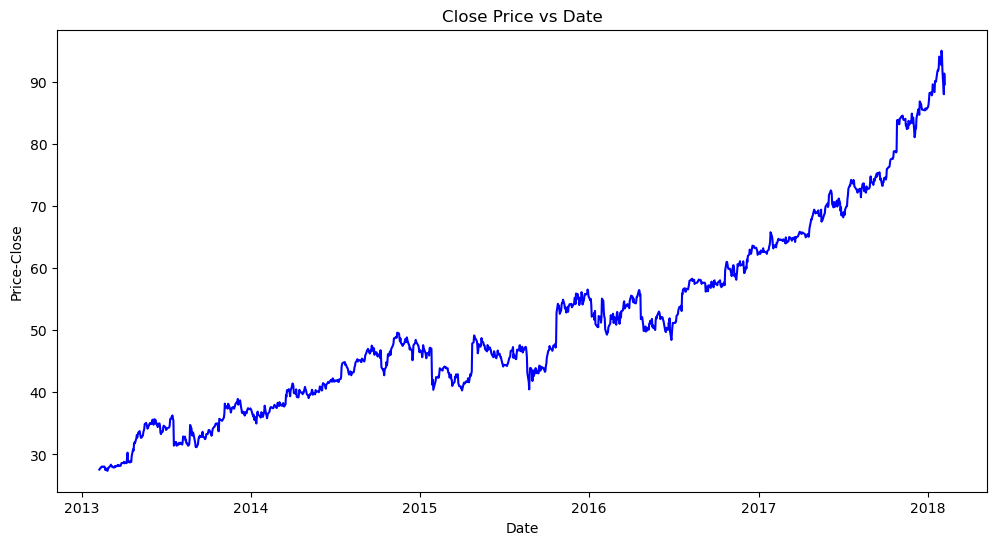

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['close'],'b')
plt.xlabel("Date")
plt.ylabel('Price-Close')
plt.title("Close Price vs Date")
plt.show()

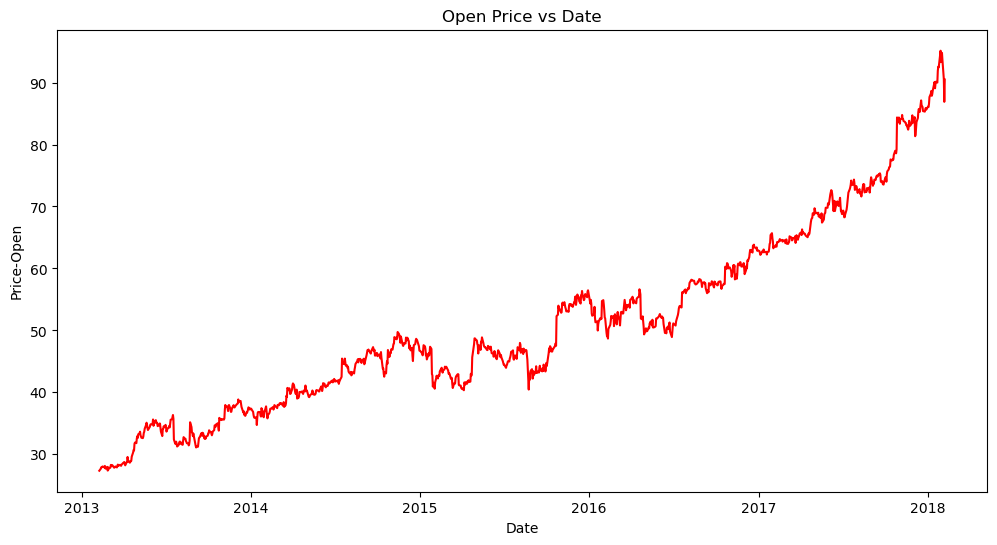

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['open'],'r')
plt.xlabel("Date")
plt.ylabel('Price-Open')
plt.title("Open Price vs Date")
plt.show()

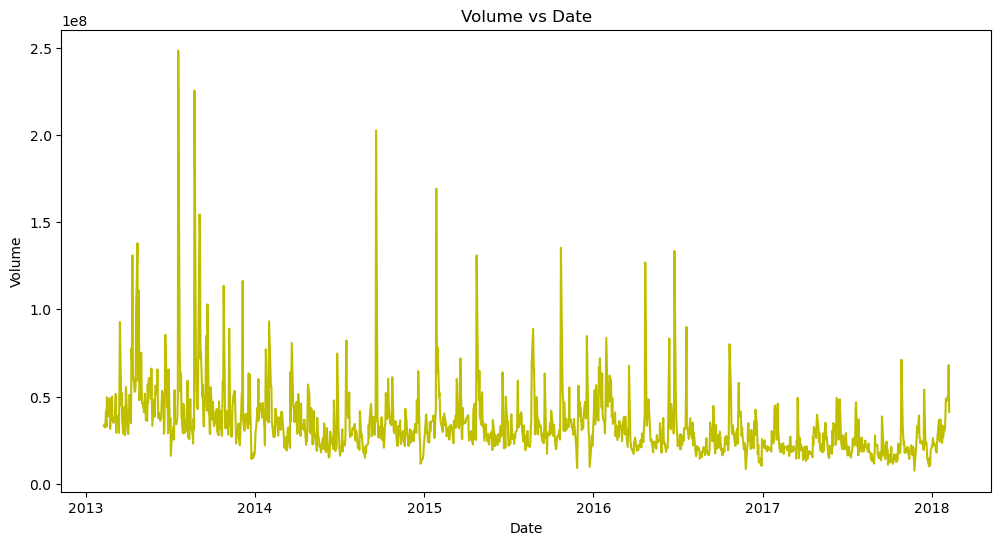

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['volume'],'y')
plt.xlabel("Date")
plt.ylabel('Volume')
plt.title("Volume vs Date")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

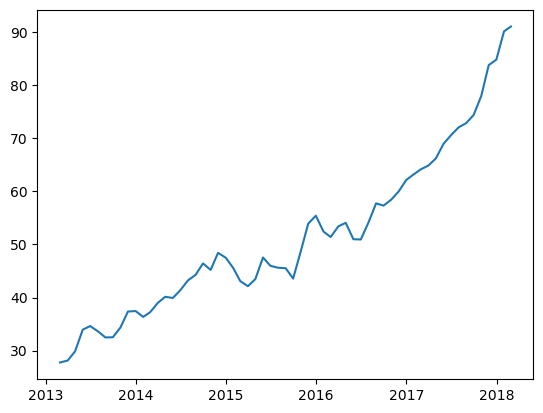

In [ ]:
plt.plot(df['close'].resample("ME").mean())
plt.show

In [ ]:
#Dropping Non-Numeric Data

numeric_data=df[[column for column in df.columns if df[column].dtype!='object' ]]

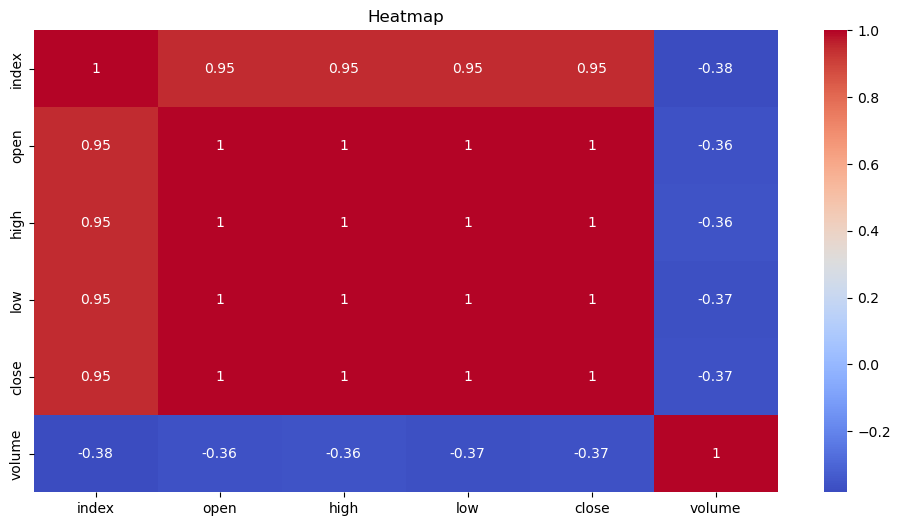

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(numeric_data.corr(),annot=True,cmap='coolwarm')
plt.title("Heatmap")
plt.show()

# Model Building and Training

In [ ]:
df_close=df['close']

In [ ]:
#converting them to numpy arrays 

dataset=df_close.values

In [ ]:
training_data_len=int(np.ceil(len(dataset)*0.95))

In [ ]:
scaler=StandardScaler()
scaled=scaler.fit_transform(dataset.reshape(-1,1))

In [ ]:
train=scaled[:training_data_len]

In [ ]:
x_train, y_train=[],[]

#sliding window for the data

for i in range(60,len(train)):
    x_train.append(train[i-60:i,0])
    y_train.append(train[i,0])

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
#building the model
model=keras.models.Sequential()
model.add(keras.layers.LSTM(64,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(keras.layers.LSTM(64,return_sequences=False))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

model.summary()

model.compile(optimizer="adam",loss="mae",metrics=[keras.metrics.RootMeanSquaredError()])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 58,369
Trainable params: 58,369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
training=model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
36/36 [==============================] - 6s 39ms/step - loss: 0.2484 - root_mean_squared_error: 0.3750
Epoch 2/100
36/36 [==============================] - 1s 39ms/step - loss: 0.1327 - root_mean_squared_error: 0.1826
Epoch 3/100
36/36 [==============================] - 1s 39ms/step - loss: 0.1213 - root_mean_squared_error: 0.1665
Epoch 4/100
36/36 [==============================] - 1s 39ms/step - loss: 0.1124 - root_mean_squared_error: 0.1500
Epoch 5/100
36/36 [==============================] - 1s 39ms/step - loss: 0.1128 - root_mean_squared_error: 0.1591
Epoch 6/100
36/36 [==============================] - 1s 39ms/step - loss: 0.1073 - root_mean_squared_error: 0.1463
Epoch 7/100
36/36 [==============================] - 1s 38ms/step - loss: 0.1068 - root_mean_squared_error: 0.1457
Epoch 8/100
36/36 [==============================] - 1s 38ms/step - loss: 0.1057 - root_mean_squared_error: 0.1464
Epoch 9/100
36/36 [==============================] - 1s 39ms/step - loss: 0.1047

In [ ]:
test_data = scaled[training_data_len - 60:]
X_test = []
y_test = dataset[training_data_len:] 

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) 

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 12ms/step


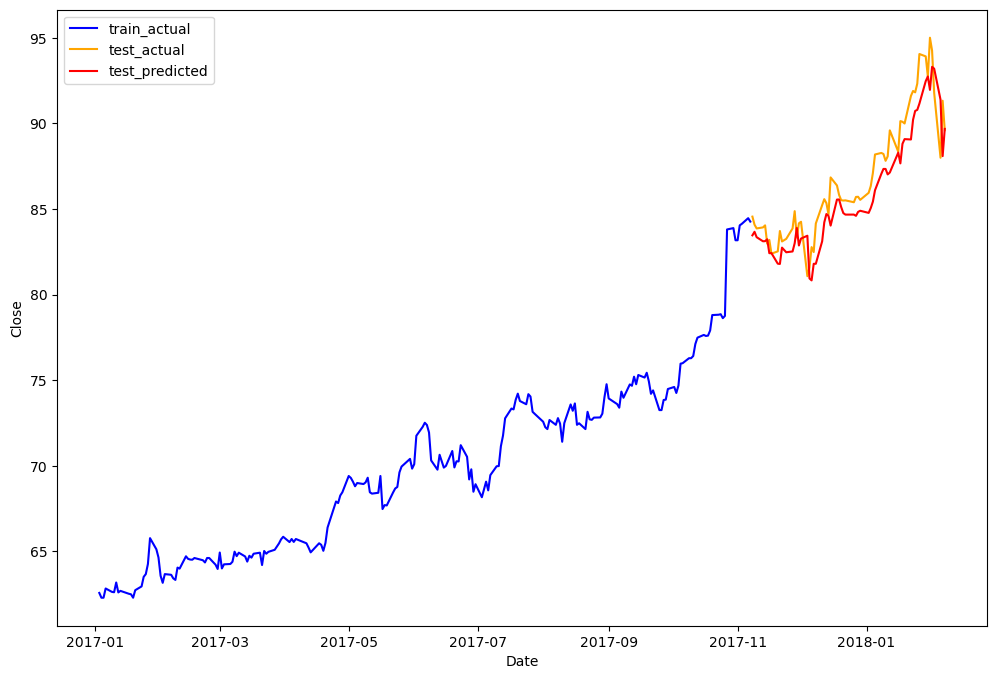

In [ ]:
train=df[:training_data_len]
test=df[training_data_len:]

test=test.copy()

test['predictions']=predictions

plt.figure(figsize=(12,8))
plt.plot(train['close']['2017-':],label="train_actual",color='blue')
plt.plot(test['close'],label="test_actual",color='orange')
plt.plot(test['predictions'],label="test_predicted",color='red')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend()
plt.show()


In [ ]:
# Function to assess model and visualize output
def model_assessment(train, test, predictions, chart_title):
  # Set the size of the plot to 10 inches by 4 inches
  plt.figure(figsize = (10,4))
  # Plot the train, test, and forecast data
  plt.plot(train, label = 'Train')
  plt.plot(test, label = 'Test')
  plt.plot(predictions, label = "Forecast")
  # add title and legend to the plot
  plt.title(f"Train, Test and Predictions with {chart_title}")
  plt.legend()
  plt.show()

  # Calculating the MAE, RMSE, and MAPE
  mae = mean_absolute_error(test, predictions)
  rmse = root_mean_squared_error(test, predictions)
  mape = mean_absolute_percentage_error(test, predictions)

  # Print the calculated error metrics
  print(f"The MAE is {mae:.2f}")
  print(f"The RMSE is {rmse:.2f}")
  print(f"The MAPE is {100 * mape:.2f} %")

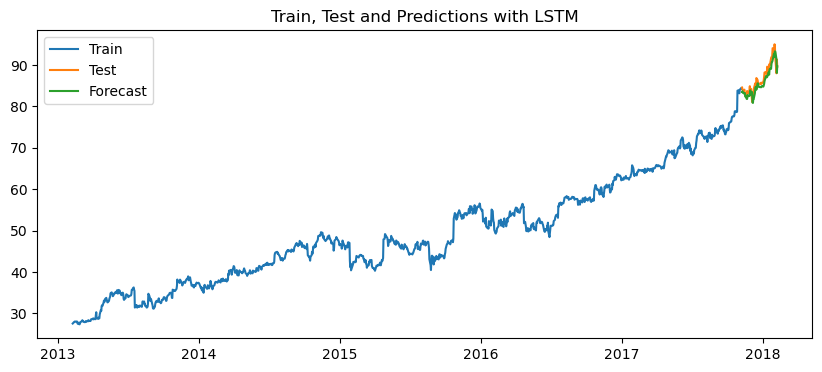

The MAE is 1.23
The RMSE is 1.49
The MAPE is 1.41 %


In [ ]:
model_assessment(train['close'],test['close'],test['predictions'],'LSTM')

In [ ]:
#trying ARIMA,SARIMA and SARIMAX
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima, ARIMA, model_selection
from sklearn.model_selection import ParameterGrid

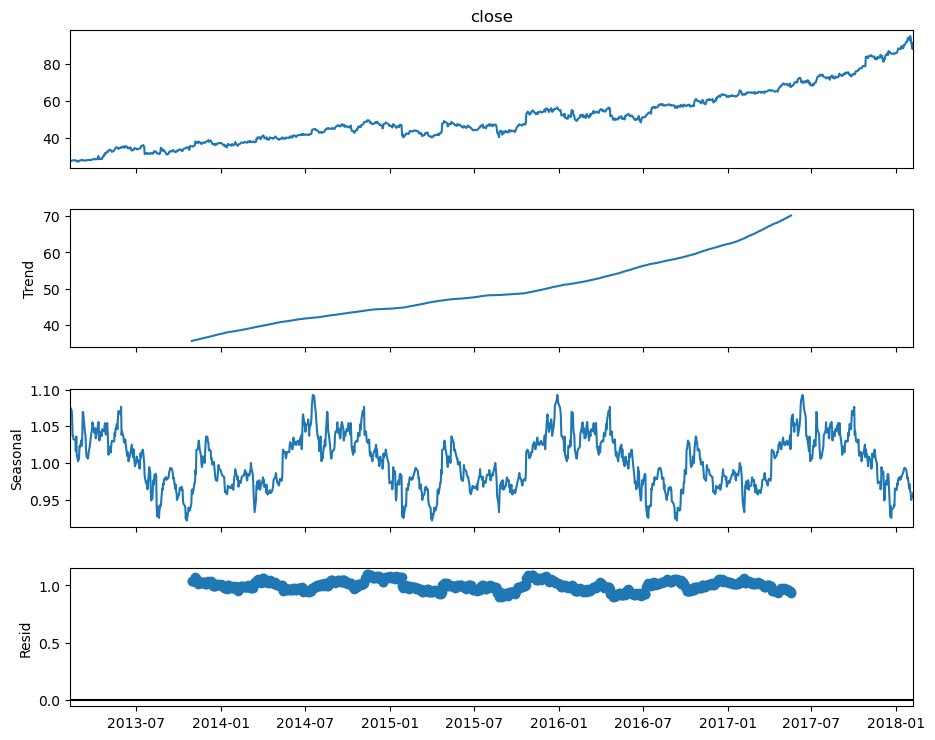

In [ ]:
decomposition = seasonal_decompose(df['close'],
                                   model = 'mul',
                                   period = 365)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

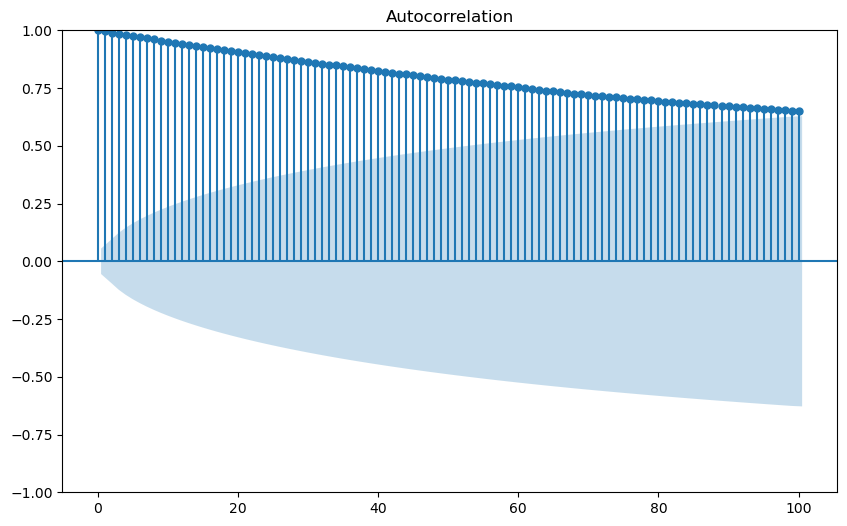

In [ ]:
# Plot the autocorrelation (ACF) of revenue values
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['close'], lags = 100, ax = ax)
plt.show()

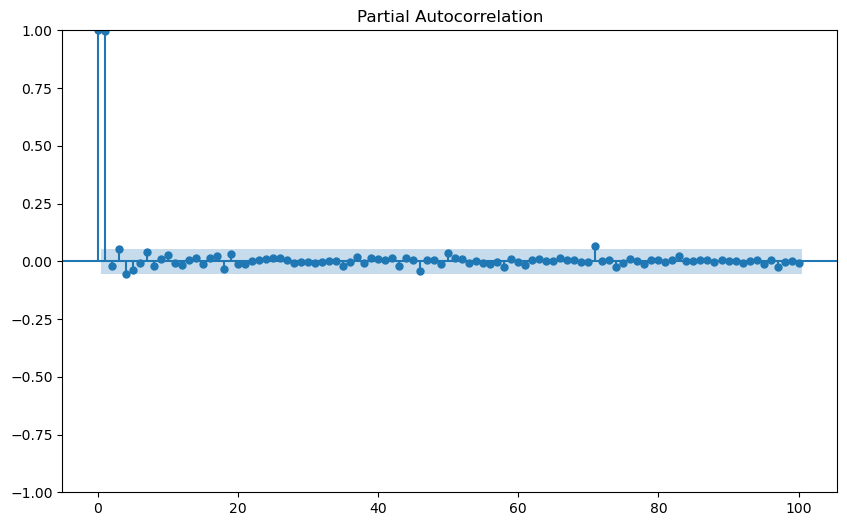

In [ ]:
# Plot the partial autocorrelation (PACF) of revenue values
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df['close'], lags = 100, ax = ax)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
# 'result' contains the test statistic and the p-value.
result = adfuller(df.close)
print('p-value: %f' % result[1])

# Interpreting the results
if result[1] < 0.05:
    print("Evidence suggests that the time series is stationary.")
else:
    print("Evidence suggests that the time series is not stationary.")

p-value: 0.982071
Evidence suggests that the time series is not stationary.


In [ ]:
df['close_diff'] = df.close.diff().dropna()
df['close_diff']

date
2013-02-08     NaN
2013-02-11    0.31
2013-02-12    0.02
2013-02-13    0.15
2013-02-14    0.01
              ... 
2018-02-01   -0.75
2018-02-02   -2.48
2018-02-05   -3.78
2018-02-06    3.33
2018-02-07   -1.72
Name: close_diff, Length: 1259, dtype: float64

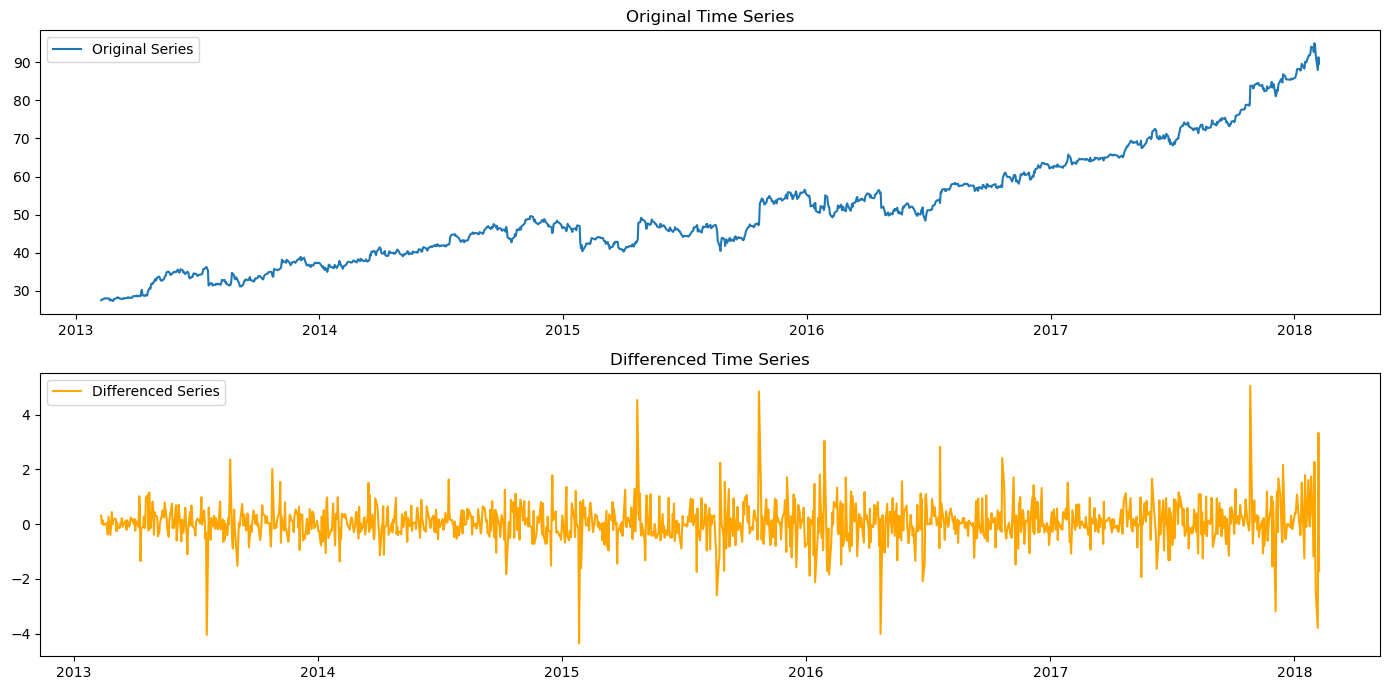

In [ ]:
# Plotting the original and differenced series
# Set the size of the plot to 14 inches by 7 inches
plt.figure(figsize=(14, 7))

# Subplot for the original series
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(df.close, label='Original Series')
plt.title('Original Time Series')
plt.legend()

# Subplot for the differenced series
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(df.close_diff, label='Differenced Series', color='orange')
plt.title('Differenced Time Series')
plt.legend()

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()
plt.show()

In [ ]:
result = adfuller(df['close_diff'].dropna())
print('p-value: %f' % result[1])

# Interpreting the results
if result[1] < 0.05:
    print("Evidence suggests that the time series is stationary.")
else:
    print("Evidence suggests that the time series is not stationary.")

p-value: 0.000000
Evidence suggests that the time series is stationary.


In [ ]:
df = df.asfreq("3D")

In [ ]:
#ARIMA
model = auto_arima(train['close'],
                   seasonal = False)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1197
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1220.020
Date:                Fri, 08 Aug 2025   AIC                           2444.040
Time:                        11:32:33   BIC                           2454.214
Sample:                             0   HQIC                          2447.873
                               - 1197                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0474      0.020      2.431      0.015       0.009       0.086
sigma2         0.4504      0.007     60.568      0.000       0.436       0.465
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5420.67
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""